In [ ]:
# 표준화 : 평균0, 표준편차1인 표준정규분포
# 1) 표준화=(각데이터-평균값)/표준편차
# 2) zscore()
# 3) fit_transform()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=np.random.randint(30, size=(6,5))
data

array([[ 2, 28,  9, 10, 26],
       [26, 16, 11, 27, 26],
       [ 7, 28, 13,  2,  6],
       [ 5, 24, 24, 25, 24],
       [23,  3,  4, 16,  6],
       [ 4, 15,  0, 19, 13]])

In [19]:
data.mean() # 전체 평균
np.mean(data) # 전체 평균 

np.mean(data, axis=0) # 5개, 열 기준 평균
np.mean(data, axis=1) # 6개, 행 기준 평균

array([ 2, 28,  9, 10, 26])

In [22]:
# 6행5열, 각 열 단위로 표준화 작업을 진행하고 출력

def standardzation(df):
    return (df-df.mean(axis=0))/df.std(axis=0)

standardzation(data)

array([[-0.95670261,  1.01904933, -0.15434085, -0.75774596,  1.03699777],
       [ 1.54811876, -0.33968311,  0.11024347,  1.22405116,  1.03699777],
       [-0.43486482,  1.01904933,  0.37482778, -1.69035637, -1.22554282],
       [-0.64359994,  0.56613852,  1.83004153,  0.99089856,  0.81074371],
       [ 1.23501609, -1.81164325, -0.81580165, -0.05828815, -1.22554282],
       [-0.74796749, -0.45291081, -1.34497028,  0.29144075, -0.43365361]])

In [23]:
import scipy.stats as ss

In [24]:
ss.zscore(data)

array([[-0.95670261,  1.01904933, -0.15434085, -0.75774596,  1.03699777],
       [ 1.54811876, -0.33968311,  0.11024347,  1.22405116,  1.03699777],
       [-0.43486482,  1.01904933,  0.37482778, -1.69035637, -1.22554282],
       [-0.64359994,  0.56613852,  1.83004153,  0.99089856,  0.81074371],
       [ 1.23501609, -1.81164325, -0.81580165, -0.05828815, -1.22554282],
       [-0.74796749, -0.45291081, -1.34497028,  0.29144075, -0.43365361]])

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
StandardScaler().fit_transform(data)

array([[-0.95670261,  1.01904933, -0.15434085, -0.75774596,  1.03699777],
       [ 1.54811876, -0.33968311,  0.11024347,  1.22405116,  1.03699777],
       [-0.43486482,  1.01904933,  0.37482778, -1.69035637, -1.22554282],
       [-0.64359994,  0.56613852,  1.83004153,  0.99089856,  0.81074371],
       [ 1.23501609, -1.81164325, -0.81580165, -0.05828815, -1.22554282],
       [-0.74796749, -0.45291081, -1.34497028,  0.29144075, -0.43365361]])

In [27]:
# 평균보다 이상치에 덜 민감한 중앙값을 사용

from sklearn.preprocessing import RobustScaler
# RobustScaler는 기존의 표준화방법의 문제점인 평균, 표준편차는 
# 특이값의 영향을 많이 받게 됨 -> 표준화 결과가 왜곡

# RobustScaler로 표준화 = (각 데이터 - 중앙값 )/ IQR 
# Robust = 외부의 영향에도 덜 민감한 (강인한)

In [28]:
RobustScaler().fit_transform(data)

array([[-0.27118644,  0.68085106, -0.13793103, -0.625     ,  0.42253521],
       [ 1.3559322 , -0.34042553,  0.13793103,  0.79166667,  0.42253521],
       [ 0.06779661,  0.68085106,  0.4137931 , -1.29166667, -0.70422535],
       [-0.06779661,  0.34042553,  1.93103448,  0.625     ,  0.30985915],
       [ 1.15254237, -1.44680851, -0.82758621, -0.125     , -0.70422535],
       [-0.13559322, -0.42553191, -1.37931034,  0.125     , -0.30985915]])

In [29]:
# MinMaxScaler, minmax_scale: 0~1사이의 값으로 스케일링 (보통 신경망 모델을 만들 때)

from sklearn.preprocessing import MinMaxScaler, minmax_scale

In [33]:
data

array([[ 2, 28,  9, 10, 26],
       [26, 16, 11, 27, 26],
       [ 7, 28, 13,  2,  6],
       [ 5, 24, 24, 25, 24],
       [23,  3,  4, 16,  6],
       [ 4, 15,  0, 19, 13]])

In [36]:
data_m1= (data -data.min(axis=0)) / (data.max(axis=0)-data.min(axis=0))
data_m1
# minmaxscaler의 과정

array([[0.        , 1.        , 0.375     , 0.32      , 1.        ],
       [1.        , 0.52      , 0.45833333, 1.        , 1.        ],
       [0.20833333, 1.        , 0.54166667, 0.        , 0.        ],
       [0.125     , 0.84      , 1.        , 0.92      , 0.9       ],
       [0.875     , 0.        , 0.16666667, 0.56      , 0.        ],
       [0.08333333, 0.48      , 0.        , 0.68      , 0.35      ]])

In [38]:
MinMaxScaler().fit_transform(data)

array([[0.        , 1.        , 0.375     , 0.32      , 1.        ],
       [1.        , 0.52      , 0.45833333, 1.        , 1.        ],
       [0.20833333, 1.        , 0.54166667, 0.        , 0.        ],
       [0.125     , 0.84      , 1.        , 0.92      , 0.9       ],
       [0.875     , 0.        , 0.16666667, 0.56      , 0.        ],
       [0.08333333, 0.48      , 0.        , 0.68      , 0.35      ]])

In [39]:
minmax_scale(data, axis=0)

array([[0.        , 1.        , 0.375     , 0.32      , 1.        ],
       [1.        , 0.52      , 0.45833333, 1.        , 1.        ],
       [0.20833333, 1.        , 0.54166667, 0.        , 0.        ],
       [0.125     , 0.84      , 1.        , 0.92      , 0.9       ],
       [0.875     , 0.        , 0.16666667, 0.56      , 0.        ],
       [0.08333333, 0.48      , 0.        , 0.68      , 0.35      ]])

In [ ]:
# 이진화
# 연속형 변수값 -> 기준에 따라 -> 0또는 1로 이진화
# 베르누이 시행(성공/실패)
# 성공확률이 p인 베르누이 시행을 n번 반복했을 때, 
# 성공횟수를 x라고 한다면, 
# 확률변수 x는 n과 p인 이항분포를 따른다. 

# nCx * P**x * q**(n-x)

In [40]:
# 이산화, 이항변수화
from sklearn.preprocessing import Binarizer

In [49]:
binarizer = Binarizer().fit(data)
binarizer.transform(data)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1]])

In [43]:
print(binarizer)
# help(Binarizer)

Binarizer()


In [56]:
b2=Binarizer(threshold=15)
b2.transform(data)

array([[0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [57]:
from sklearn.preprocessing import binarize

In [59]:
binarize(data, threshold=15)
# default가 copy=True
# copy=False는 원본에 저장 

array([[0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
# 원핫인코더(OneHotEncoder) = 하나만 핫하게 인코더
# Hot은 1을 의미함. 1개만 1이고 나머지는 0이 되도록 인코딩 3 q
# 성별(범주형) -> 0(남성) 또는 1(여성)  (이산화) -> 10 또는 01
# 연령대 -> 0(20대), 1(30대), 2(40대) -> 100 또는 010 또는 001
# 학점 -> A(0),B(1),C(2),D(3),E(4),F(5) -> 10000 01000 00100 00010 00001


In [ ]:
# 학생1 0 0 0 (성별-연령대-학점) -> 원핫인코딩 -> 10 100 10000
# 학생2 0 1 1
...
# 학생n 1 1 5 -> 원핫인코딩 -> 01 010 00001

# => 이 데이터는 원핫인코딩 되기 이전 

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
data = np.array([[0,0,0],
        [0,1,1],
        [1,2,2],
        [1,2,4]])

In [65]:
# data-> 원핫인코딩

array([[0, 0, 0],
       [0, 1, 1],
       [1, 2, 2],
       [1, 2, 4]])

In [69]:
enc=OneHotEncoder()
enc.fit(data)
# 원핫인코더 객체만듦. 객체 안에 fit이란 함수가 있음

OneHotEncoder()

In [73]:
# enc.get_feature_names()

In [72]:
enc.transform(data).toarray()

array([[1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.]])

In [75]:
df = pd.DataFrame({'C1': np.random.randn(20),
 'C2': ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a','b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']})


In [76]:
df

,C1,C2
0,0.669587,a
1,-1.597415,a
2,-1.357906,a
3,0.205834,a
4,1.220715,a
5,0.100877,a
6,-0.798325,a
7,0.282583,a
8,0.148144,a
9,0.749454,a


In [ ]:
# C1열 값에 대해 구간을 나누고자 함
# 최소값~최대값을 5개 구간으로 균등하게 나눔

In [78]:
df.C1.min()
df.C1.max()

1.9992636642389152

In [79]:
bins=np.linspace(df.C1.min(), df.C1.max(), 5) # 균등구간
bins

array([-1.74521703, -0.80909686,  0.12702332,  1.06314349,  1.99926366])

In [82]:
df['C1bin'] =np.digitize(df['C1'], bins)
# 1은 -1.74521703 ~ -0.80909686 사이에 속함 ...
# 5는 맨 마지막 값 


In [84]:
df

,C1,C2,C1bin
0,0.669587,a,3
1,-1.597415,a,1
2,-1.357906,a,1
3,0.205834,a,3
4,1.220715,a,4
5,0.100877,a,2
6,-0.798325,a,2
7,0.282583,a,3
8,0.148144,a,3
9,0.749454,a,3


In [85]:
# 각 구간별 데이터 건수 출력 
from collections import Counter

In [86]:
Counter(df['C1bin'])

Counter({3: 9, 1: 5, 4: 1, 2: 4, 5: 1})

In [98]:
df.groupby('C1bin').get_group(1)
df.groupby('C1bin').get_group(2)
df.groupby('C1bin').get_group(3) 

df.groupby('C1bin').C1.count()

C1bin
1    5
2    4
3    9
4    1
5    1
Name: C1, dtype: int64

In [101]:
df.groupby('C1bin').C1.std()
df.groupby('C1bin').C1.sum()
df.groupby('C1bin').C1.mean()

C1bin
1   -1.390027
2   -0.277801
3    0.516391
4    1.220715
5    1.999264
Name: C1, dtype: float64

In [102]:
df[df['C1bin']==2]

,C1,C2,C1bin
5,0.100877,a,2
6,-0.798325,a,2
12,0.092867,b,2
19,-0.506623,b,2


In [104]:
# df C1bin열에 대해 
pd.get_dummies(df['C1bin'], prefix='C1') # prefix=접두어

,C1_1,C1_2,C1_3,C1_4,C1_5
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [119]:
df
# c1열 값 > c1열 값의 평균 => 'high'
# else => 'low'
# high_low열에 저장


df[df.C1 > df.C1.mean()]
# df[df.C1 < df.C1.mean()]

df['high_low'] =pd.cut(df.C1, bins=[df.C1.min(), df.C1.mean(), df.C1.max()], labels=['low', 'high'])


In [124]:
df

,C1,C2,C1bin,high_low
0,0.669587,a,3,high
1,-1.597415,a,1,low
2,-1.357906,a,1,low
3,0.205834,a,3,high
4,1.220715,a,4,high
5,0.100877,a,2,high
6,-0.798325,a,2,low
7,0.282583,a,3,high
8,0.148144,a,3,high
9,0.749454,a,3,high


In [128]:
# 꼭 보기
df['high_low'] = list(map(lambda x: 'high' if x else 'low',df.C1 > df.C1.mean()))
df

,C1,C2,C1bin,high_low
0,0.669587,a,3,high
1,-1.597415,a,1,low
2,-1.357906,a,1,low
3,0.205834,a,3,high
4,1.220715,a,4,high
5,0.100877,a,2,high
6,-0.798325,a,2,low
7,0.282583,a,3,high
8,0.148144,a,3,high
9,0.749454,a,3,high


In [129]:
# np.where(조건, 참, 거짓)
df['high_low']=np.where(df['C1']>df.C1.mean(), 'high', 'low')
df

,C1,C2,C1bin,high_low
0,0.669587,a,3,high
1,-1.597415,a,1,low
2,-1.357906,a,1,low
3,0.205834,a,3,high
4,1.220715,a,4,high
5,0.100877,a,2,high
6,-0.798325,a,2,low
7,0.282583,a,3,high
8,0.148144,a,3,high
9,0.749454,a,3,high


In [131]:
df.groupby('high_low').size()
df.groupby('high_low').mean()

,C1,C1bin
high_low,,
high,0.620095,3.076923
low,-1.179297,1.285714


In [132]:
df.groupby('high_low').C1.mean()

high_low
high    0.620095
low    -1.179297
Name: C1, dtype: float64

In [135]:
Q1 = np.percentile(df['C1'], 25) # 1사분위수(25%)
Q3 = np.percentile(df['C1'], 75) # 3사분위수(75%)

# IQR = Q3-Q1
# Q3+IQR*1.5 => 아웃라이어 범위
# Q1-IQR*1.5 => 아웃라이어 범위

In [136]:
# 조건이 3개 이상일떄 
df['high_med_low']=np.where(df['C1']<Q1 , 'low', 
                            np.where(df['C1']<Q3 ,'med' ,'high'))
df

,C1,C2,C1bin,high_low,high_med_low
0,0.669587,a,3,high,med
1,-1.597415,a,1,low,low
2,-1.357906,a,1,low,low
3,0.205834,a,3,high,med
4,1.220715,a,4,high,high
5,0.100877,a,2,high,med
6,-0.798325,a,2,low,med
7,0.282583,a,3,high,med
8,0.148144,a,3,high,med
9,0.749454,a,3,high,high


In [140]:
# ./ : 현재 폴더 
# ../ : 상위 폴더

pew=pd.read_csv('../../data/pew.csv')
# 종교와 연봉 사이의 관계
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [ ]:
# 데이터 구조 변경 : 피봇테이블, 스택/언스택, 멜트(melt) : 데이터 재구조화

In [141]:
data = pd.DataFrame({'c_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
'p_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
'p_cnt' : [1, 2, 3, 4],
'p_amt' : [100, 200, 300, 400]})


In [142]:
data

,c_ID,p_CD,p_cnt,p_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [145]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

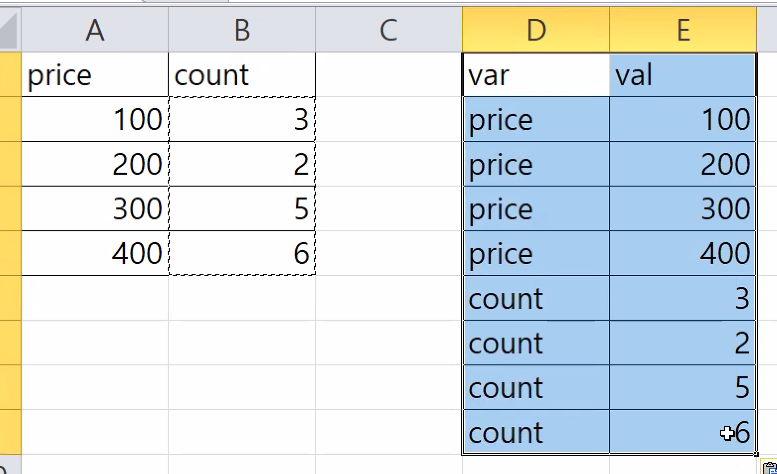

In [148]:
from PIL import Image
 
Image.open("./images/melt.png")

In [150]:
pd.melt(data)

,variable,value
0,c_ID,C_001
1,c_ID,C_001
2,c_ID,C_002
3,c_ID,C_002
4,p_CD,P_001
5,p_CD,P_002
6,p_CD,P_001
7,p_CD,P_002
8,p_cnt,1
9,p_cnt,2


In [156]:
# id_vars : 고정하고 싶은 열
pd.melt(data, id_vars=['c_ID', 'p_CD'])

,c_ID,p_CD,variable,value
0,C_001,P_001,p_cnt,1
1,C_001,P_002,p_cnt,2
2,C_002,P_001,p_cnt,3
3,C_002,P_002,p_cnt,4
4,C_001,P_001,p_amt,100
5,C_001,P_002,p_amt,200
6,C_002,P_001,p_amt,300
7,C_002,P_002,p_amt,400


In [161]:
data_melt=pd.melt(data, id_vars=['c_ID', 'p_CD'], 
        var_name='pch_cd', 
        value_name='pch_value')
# var_name : variable name 
# value_name : value name
data_melt
# melt된 데이터는 0번부터 행 index 번호가 부여됨

,c_ID,p_CD,pch_cd,pch_value
0,C_001,P_001,p_cnt,1
1,C_001,P_002,p_cnt,2
2,C_002,P_001,p_cnt,3
3,C_002,P_002,p_cnt,4
4,C_001,P_001,p_amt,100
5,C_001,P_002,p_amt,200
6,C_002,P_001,p_amt,300
7,C_002,P_002,p_amt,400


In [184]:
pd.pivot_table(data_melt, index=['c_ID', 'p_CD'], columns='pch_cd',values='pch_value')

pch_cd       p_amt  p_cnt
c_ID  p_CD               
C_001 P_001    100      1
      P_002    200      2
C_002 P_001    300      3
      P_002    400      4

In [186]:
pew.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [187]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [197]:
pd.melt(pew, id_vars=['religion'], var_name='income', value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [208]:
pd.melt(pew, id_vars=['religion'], var_name='income', value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [211]:
billboard = pd.read_csv('../../data/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
pd.melt(billboard, 
    id_vars=['year','artist', 'track', 'time', 'date.entered'], 
    var_name='week', 
    value_name='rating')

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN
